# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.090576e+01     7.863439e+00
 * time: 0.004697084426879883
     1     3.020097e+01     6.505919e+00
 * time: 0.01437997817993164
     2     1.796038e+01     3.862374e+00
 * time: 0.042912960052490234
     3     1.353310e+01     2.013413e+00
 * time: 0.06824207305908203
     4     1.199752e+01     2.443946e+00
 * time: 0.09370088577270508
     5     1.147340e+01     2.290133e+00
 * time: 0.11253809928894043
     6     1.046452e+01     1.607850e+00
 * time: 0.13071298599243164
     7     9.728881e+00     9.328440e-01
 * time: 0.14848995208740234
     8     9.479031e+00     8.313645e-01
 * time: 0.16689395904541016
     9     9.338362e+00     5.943031e-01
 * time: 0.18518590927124023
    10     9.250644e+00     2.813390e-01
 * time: 0.20344996452331543
    11     9.219889e+00     2.433591e-01
 * time: 0.22195196151733398
    12     9.209793e+00     2.125943e-01
 * time: 0.2408750057220459
    13     9.202817e+00     2.013891e-01
 * time

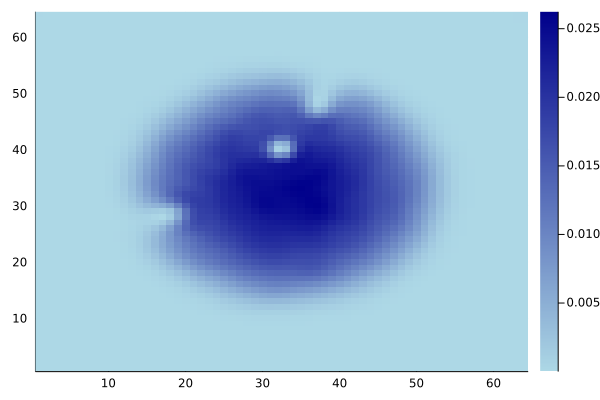

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)